In [68]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Fetch Air Quality dataset (UCI ID: 360)
air_quality = fetch_ucirepo(id=360)

In [49]:
# Extract features
X = air_quality.data.features
X.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [50]:
print(f"Shape of the dataset: {X.shape}")
print(f"Type of dataset: {type(X)}")

Shape of the dataset: (9357, 15)
Type of dataset: <class 'pandas.core.frame.DataFrame'>


In [51]:
X.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [53]:
X.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [54]:
#Dropping non numeric features(In this case, data and time since they are objects)
X.drop(['Date', 'Time'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int64  
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int64  
 5   NOx(GT)        9357 non-null   int64  
 6   PT08.S3(NOx)   9357 non-null   int64  
 7   NO2(GT)        9357 non-null   int64  
 8   PT08.S4(NO2)   9357 non-null   int64  
 9   PT08.S5(O3)    9357 non-null   int64  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 950.4 KB


In [55]:
#Checking which all features have unique values
for feature in X.columns:
    print(f"Feature name:  {feature} | Number of unique values in feature: {len(X[feature].unique())}")
print(f"Total number of records: {X.shape[0]}")

Feature name:  CO(GT) | Number of unique values in feature: 97
Feature name:  PT08.S1(CO) | Number of unique values in feature: 1042
Feature name:  NMHC(GT) | Number of unique values in feature: 430
Feature name:  C6H6(GT) | Number of unique values in feature: 408
Feature name:  PT08.S2(NMHC) | Number of unique values in feature: 1246
Feature name:  NOx(GT) | Number of unique values in feature: 926
Feature name:  PT08.S3(NOx) | Number of unique values in feature: 1222
Feature name:  NO2(GT) | Number of unique values in feature: 284
Feature name:  PT08.S4(NO2) | Number of unique values in feature: 1604
Feature name:  PT08.S5(O3) | Number of unique values in feature: 1744
Feature name:  T | Number of unique values in feature: 437
Feature name:  RH | Number of unique values in feature: 754
Feature name:  AH | Number of unique values in feature: 6684
Total number of records: 9357


In [56]:
col = X.columns

In [58]:
#Feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=[col])
X

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141,0.992715
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984,0.992556
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806,0.992678
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589,0.992858
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203,0.992869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.958471,0.675893,0.000000,0.809632,0.538940,0.400238,0.256330,0.722222,0.529076,0.708410,0.907195,0.794250,0.992710
9353,0.955168,0.608482,0.000000,0.801669,0.508285,0.329363,0.278876,0.701852,0.492101,0.539479,0.917007,0.774853,0.992488
9354,0.955168,0.599107,0.000000,0.805461,0.523198,0.293627,0.278529,0.694444,0.484370,0.474477,0.927637,0.756148,0.992136
9355,0.953752,0.537054,0.000000,0.794463,0.480944,0.259083,0.312869,0.659259,0.417143,0.356225,0.933361,0.739522,0.991509


In [61]:
#Making a k-means cluster model with 3 clusters and fitting the dataset into it.
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [63]:
kmeans.cluster_centers_ #Provides a list of centroids that have min possible intertia

array([[ 9.53891984e-01,  5.85080690e-01,  3.58355645e-02,
         7.97405140e-01,  4.75227059e-01,  2.53771032e-01,
         3.56198429e-01,  5.49352457e-01,  5.52858058e-01,
         4.56670193e-01,  8.90312448e-01,  8.62695103e-01,
         9.93860750e-01],
       [-3.33066907e-16,  5.58888184e-01,  2.51477150e-03,
         7.93417388e-01,  4.57034683e-01,  5.10933120e-02,
         3.72432582e-01,  1.45144932e-01,  5.73981928e-01,
         4.15358074e-01,  9.02529488e-01,  8.65987618e-01,
         9.94834610e-01],
       [ 8.62346142e-01, -3.33066907e-16,  2.25995035e-02,
         9.99200722e-16, -2.22044605e-16,  2.90826572e-01,
        -5.55111512e-17,  5.45486744e-01,  6.66133815e-16,
        -2.77555756e-16,  2.22044605e-16,  0.00000000e+00,
        -1.11022302e-15]])

In [64]:
kmeans.inertia_

1207.8338578006174

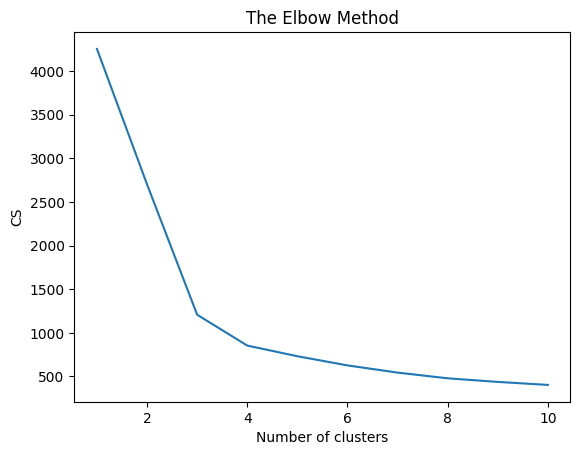

In [65]:
#Since the intertia is quite hight, we will need to select a better k value
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [66]:
#Trying again with k=4
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [67]:
kmeans.inertia_

854.3687954581497

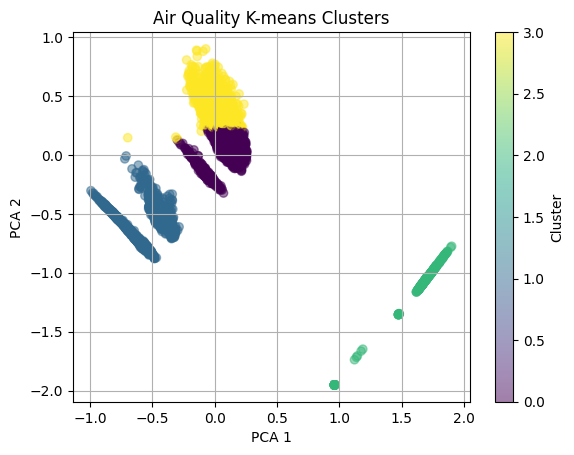

In [69]:
clusters = kmeans.fit_predict(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Air Quality K-means Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()